<a href="https://colab.research.google.com/github/khalid-shohag/AI_LAB/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [57]:
#DNN Model
class DNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.first_hidden_layer = nn.Linear(in_features=1, out_features=32)
    self.second_hidden_layer = nn.Linear(in_features=32, out_features=64)
    self.third_hidden_layer = nn.Linear(in_features=64, out_features=128)
    self.fourth_hidden_layer = nn.Linear(in_features=128, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    x = torch.relu(self.first_hidden_layer(x))
    x = torch.relu(self.second_hidden_layer(x))
    x = torch.relu(self.third_hidden_layer(x))
    x = torch.relu(self.fourth_hidden_layer(x))
    return x

In [58]:
#Call the model
model = DNN()

#Displaying the model and its parameters
print(model)

#Display model weights and biases
print(model.state_dict())

DNN(
  (first_hidden_layer): Linear(in_features=1, out_features=32, bias=True)
  (second_hidden_layer): Linear(in_features=32, out_features=64, bias=True)
  (third_hidden_layer): Linear(in_features=64, out_features=128, bias=True)
  (fourth_hidden_layer): Linear(in_features=128, out_features=1, bias=True)
)
OrderedDict([('first_hidden_layer.weight', tensor([[ 0.3052],
        [-0.4260],
        [-0.3287],
        [-0.4130],
        [ 0.8598],
        [ 0.8463],
        [-0.7800],
        [-0.3085],
        [ 0.9058],
        [-0.0576],
        [-0.4869],
        [ 0.1209],
        [ 0.7912],
        [-0.1273],
        [-0.9436],
        [-0.3343],
        [ 0.4977],
        [-0.1478],
        [ 0.7065],
        [ 0.3439],
        [ 0.0088],
        [ 0.3820],
        [-0.1350],
        [-0.8573],
        [-0.8570],
        [-0.7866],
        [-0.1593],
        [-0.7231],
        [ 0.1466],
        [ 0.1147],
        [ 0.7609],
        [ 0.0562]])), ('first_hidden_layer.bias', tensor([ 

In [59]:
def polynomial(x):
  return 5 * x*x*x - 8*x*x - 7*x + 1

16000


(-1.0, 1.0)

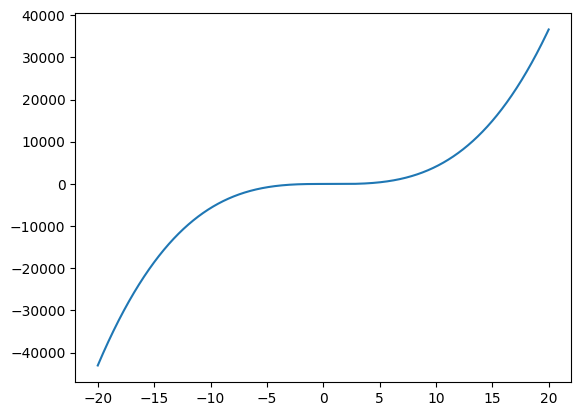

In [60]:
#Generating Training Samples
# num_of_samples = 500
X = torch.arange(start=-20, end=20, step=0.0025)
y = polynomial(X)

plt.plot(X, y)
print(len(X))

#Normalization
from sklearn.preprocessing import MinMaxScaler as mms

scaler = mms(feature_range=(-1, 1))
X = scaler.fit_transform(X.reshape(-1, 1)).squeeze() #Make 1D tesnor into 2D
y = scaler.fit_transform(y.reshape(-1, 1)).squeeze()

X.min().item(), y.max().item()

In [61]:
#Split data
X, y = torch.tensor(X, dtype=torch.float32).unsqueeze(dim=1), torch.tensor(y, dtype=torch.float32).unsqueeze(dim=1)
# X, y
size1 = int(0.9*len(X))
size2 = int(0.95*len(X))
# size1, size2

X_train, y_train = X[:size1], y[:size1]
X_validate, y_validate = X[size1:size2], y[size1:size2]
X_test, y_test = X[size2:], y[size2:]
len(X_train), len(X_validate), len(X_test)

(14400, 800, 800)

In [62]:
#Training vs Validation

#Loss Function
loss_fn = nn.MSELoss() #MAE
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0005)

epochs = 1000
train_loss = []
valid_loss = []

print(X_train.dtype)

for epoch in range(epochs):

  #Training
  model.train()
  train_pred = model(X_train)
  loss = loss_fn(train_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()




  #Validation
  model.eval()
  with torch.inference_mode():
    val_pred = model(X_validate)
    val_loss = loss_fn(val_pred, y_validate)
    train_loss.append(loss.detach().numpy())
    valid_loss.append(val_loss.detach().numpy())

    if epoch > 0 and valid_loss[-1] > valid_loss[-2]:
        print("Early stopping at epoch", epoch)
        break


    if epoch%100==0:
      print(f'Epoch: {epoch} | MAE Train Loss: {loss} | MAE VAL Loss: {val_loss}')


torch.float32
Epoch: 0 | MAE Train Loss: 0.08945215493440628 | MAE VAL Loss: 0.30841585993766785
Epoch: 100 | MAE Train Loss: 0.07309053838253021 | MAE VAL Loss: 0.02579968422651291
Epoch: 200 | MAE Train Loss: 0.072783462703228 | MAE VAL Loss: 0.008725741878151894
Epoch: 300 | MAE Train Loss: 0.07277341187000275 | MAE VAL Loss: 0.0072663105092942715
Epoch: 400 | MAE Train Loss: 0.07277049869298935 | MAE VAL Loss: 0.006441163364797831
Epoch: 500 | MAE Train Loss: 0.07276929169893265 | MAE VAL Loss: 0.005926540587097406
Epoch: 600 | MAE Train Loss: 0.07276856154203415 | MAE VAL Loss: 0.005518364254385233
Epoch: 700 | MAE Train Loss: 0.07276812940835953 | MAE VAL Loss: 0.005184583831578493
Epoch: 800 | MAE Train Loss: 0.07276786863803864 | MAE VAL Loss: 0.004917668178677559
Epoch: 900 | MAE Train Loss: 0.0727676972746849 | MAE VAL Loss: 0.004704718478024006


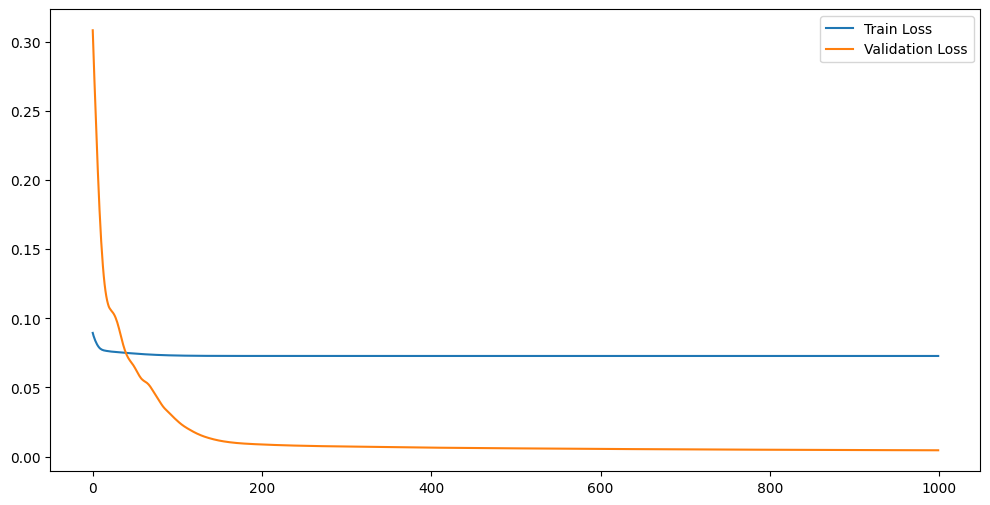

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(valid_loss, label='Validation Loss')
plt.legend()

[array(0.06807039, dtype=float32)]
MSE:  0.0680704
OrderedDict([('first_hidden_layer.weight', tensor([[ 0.2995],
        [-0.4437],
        [-0.3315],
        [-0.4130],
        [ 0.8598],
        [ 0.8463],
        [-0.7848],
        [-0.3085],
        [ 0.9226],
        [-0.0341],
        [-0.4786],
        [ 0.1209],
        [ 0.8332],
        [-0.1283],
        [-0.9498],
        [-0.3461],
        [ 0.4977],
        [-0.1478],
        [ 0.7257],
        [ 0.3573],
        [ 0.0088],
        [ 0.3864],
        [-0.1350],
        [-0.8539],
        [-0.8570],
        [-0.7663],
        [-0.1593],
        [-0.7321],
        [ 0.1614],
        [ 0.1147],
        [ 0.8269],
        [ 0.0486]])), ('first_hidden_layer.bias', tensor([ 0.1664,  0.3630, -0.2799, -0.4983, -0.9407, -0.9739,  0.0994, -0.4729,
         0.2842,  0.2415,  0.7886, -0.1221, -0.0335,  0.7226,  0.2080,  0.4845,
        -0.5400, -0.7228,  0.7524,  0.7085, -0.3786,  0.1532, -0.8893,  0.0516,
        -0.9284,  0.6130, -

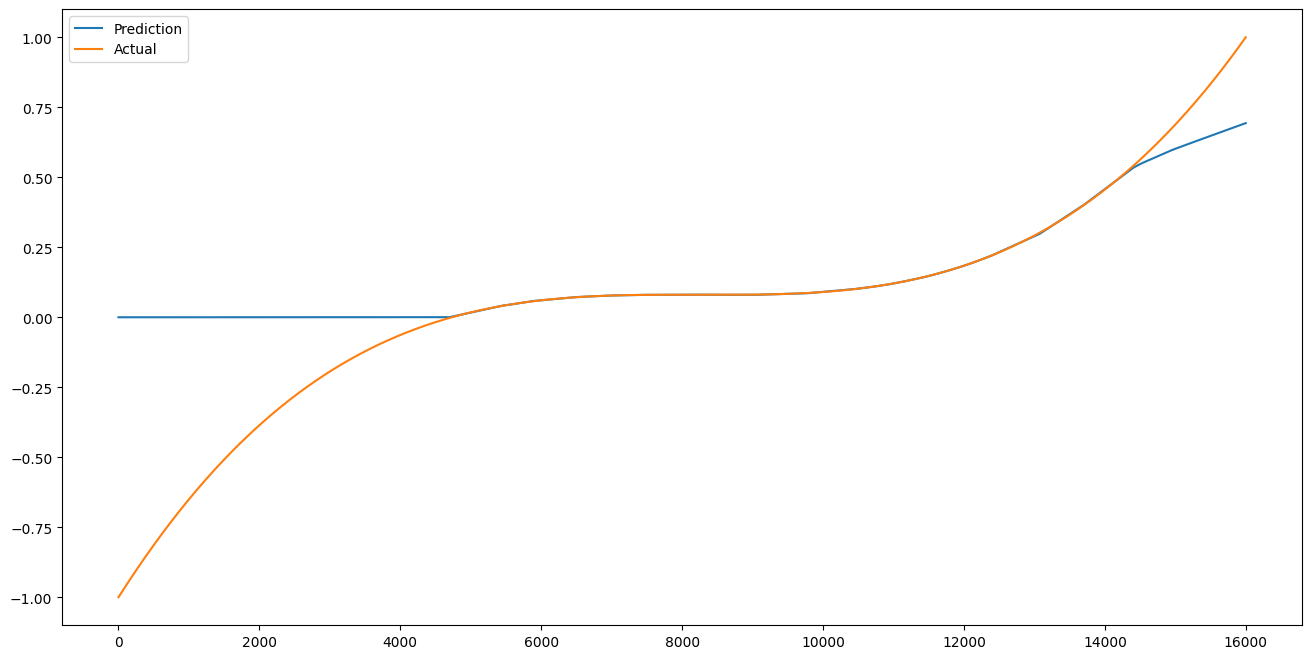

In [64]:
#Testing
model.eval()
l = []
with torch.inference_mode():
  test_pred = model(X)
  test_loss = loss_fn(test_pred, y)
  l.append(test_loss.detach().numpy())
print(l)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_pred, y)
print("MSE: ", mse)
a = test_pred.view(torch.numel(test_pred))
b = y.view(torch.numel(y))
plt.figure(figsize=(16, 8))
plt.plot(a, label='Prediction')
plt.plot(b, label='Actual')
plt.legend()
print(model.state_dict())

In [67]:
from torchsummary import summary
summary(model.cuda(), (1, ))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 32]              64
            Linear-2                   [-1, 64]           2,112
            Linear-3                  [-1, 128]           8,320
            Linear-4                    [-1, 1]             129
Total params: 10,625
Trainable params: 10,625
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04
----------------------------------------------------------------
